# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime

df_views_count = pd.read_csv('Data/wikishark_ec_page_views.csv', delimiter=",", header=0, index_col=False)
df_views_count_update = pd.read_csv('Data/wikishark_ec_page_views_updated.csv', delimiter=",", header=0, index_col=False)
df_views_count_all = pd.read_csv('Data/ec_pageviews-20191201-20220531.csv', delimiter=',', header=0, index_col=False)

df_edits_count = pd.read_csv('Data/wiki_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

df_views_count_update

,DateTime,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en]
0,2008-01-01 00:00:00,12,426,439,612
1,2008-01-02 00:00:00,4,600,660,1147
2,2008-01-03 00:00:00,4,641,663,1256
3,2008-01-04 00:00:00,14,627,672,1197
4,2008-01-05 00:00:00,7,521,535,864
...,...,...,...,...,...
5285,2022-06-21 00:00:00,194,301,644,392
5286,2022-06-22 00:00:00,175,303,610,422
5287,2022-06-23 00:00:00,142,297,611,505
5288,2022-06-24 00:00:00,222,275,558,415


In [2]:
# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_views_count_update["DateTime"] = pd.to_datetime(df_views_count_update["DateTime"])
df_edits_count["DateTime"] = pd.to_datetime(df_edits_count["DateTime"])

### 1. Data  preprocessing

In [3]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count = df_views_count.set_index("DateTime")
df_views_count_update = df_views_count_update.set_index("DateTime")
df_edits_count = df_edits_count.set_index("DateTime")
df_views_count_all

DateTime          0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


,Date,Embodied cognition
0,2019-12,11503
1,2020-01,11316
2,2020-02,10181
3,2020-03,10395
4,2020-04,11524
5,2020-05,10698
6,2020-06,8764
7,2020-07,9044
8,2020-08,9159
9,2020-09,9794


### 1. Edits count

In [4]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
DateTime,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [5]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=228)


In [6]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year2 = edit_sum_year.reset_index()
edit_sum_year2

,DateTime,Edits,Minor edits,Editors,Size
0,2002,8,2,6,492
1,2004,32,16,11,5566
2,2005,16,3,9,5782
3,2006,17,6,5,6699
4,2007,16,7,4,6896
5,2008,42,27,2,16678
6,2009,38,17,9,14475
7,2010,30,12,7,21183
8,2011,203,28,33,54061
9,2012,55,18,1,55732


In [7]:
def plot_edits_size(df, save=True):
    fig, ax1 = plt.subplots(figsize=(20, 16))
    ax2 = ax1.twinx()
    width = 0.82

    edit_sum_year2[['Edits','Minor edits','Editors']].plot(kind='bar',width=width, ax=ax1)
    edit_sum_year2[['Size']].plot(secondary_y = True, ax=ax2, color='red', marker='o')
    ax1.set_ylabel('Edits count')
    ax1.set_xlabel('Year', labelpad=10)
    ax1.set_title("Article's edits count and size per year")

    plt.gcf().autofmt_xdate(rotation=55, ha='center')
    ax1 = plt.gca()
    # make secondary y-axis (right) start from same zero value as left y-axis
    ax1.set_ylim(bottom=0)

    ax1.set_xticklabels(edit_sum_year2.DateTime.tolist())

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    if save:
        plt.savefig("Images/edits_count_and_size.eps", format='eps', dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


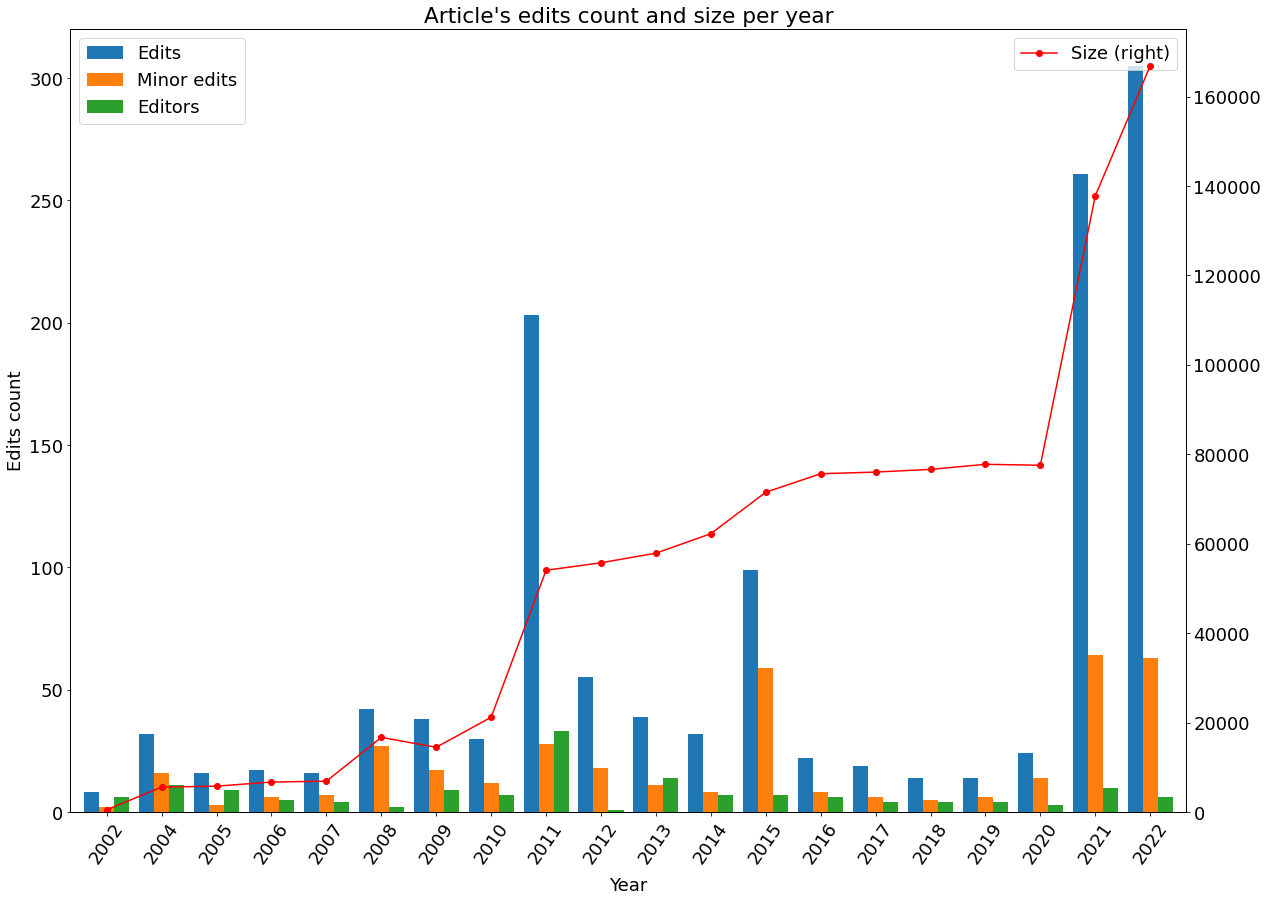

In [8]:
plot_edits_size(edit_sum_year2, save=True)

### 2. Views count

In [9]:
df_views_count
df_views_count_update

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en]
DateTime,,,,
2008-01-01,12,426,439,612
2008-01-02,4,600,660,1147
2008-01-03,4,641,663,1256
2008-01-04,14,627,672,1197
2008-01-05,7,521,535,864
...,...,...,...,...
2022-06-21,194,301,644,392
2022-06-22,175,303,610,422
2022-06-23,142,297,611,505


In [10]:
# df_month = df_views_count.index.month
# df_year = df_views_count.index.year

In [11]:
def group_moth_year(df):
    # select month and year of the data
    df_month = df.index.month
    df_year = df.index.year
    return df_month, df_year

In [12]:
moth_view, year_view = group_moth_year(df_views_count)
moth_view_update, year_view_update = group_moth_year(df_views_count_update)

In [36]:
# Moving averages per year (52 weeks window) --old csv--
views_mean = df_views_count.groupby(year_view).mean()
views_mean = pd.DataFrame(views_mean)


,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008,28.273224,707.030055,1773.275956
2009,88.493151,720.761644,2059.112329
2010,160.838356,899.821918,2512.279452
2011,192.575342,911.956164,2469.772603
2012,259.724044,903.693989,2680.142077
2013,294.917808,863.526027,2918.660274
2014,299.682192,856.465753,1893.200000
2015,265.745205,670.997260,1502.635616
2016,236.120219,591.953552,1096.346995


In [48]:
# Moving averages per year (52 weeks window) --new csv--
views_mean_up = df_views_count_update.groupby(year_view_update).sum()
views_mean_up = pd.DataFrame(views_mean_up)
views_mean_up

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en]
DateTime,,,,
2008,10348,258773,285182,649019
2009,32300,263078,328147,751576
2010,58706,328435,386010,916982
2011,70290,332864,433375,901467
2012,95059,330752,369552,980932
2013,107645,315187,366105,1065311
2014,109384,312610,233747,691018
2015,96997,244914,237752,548462
2016,86420,216655,172517,401263


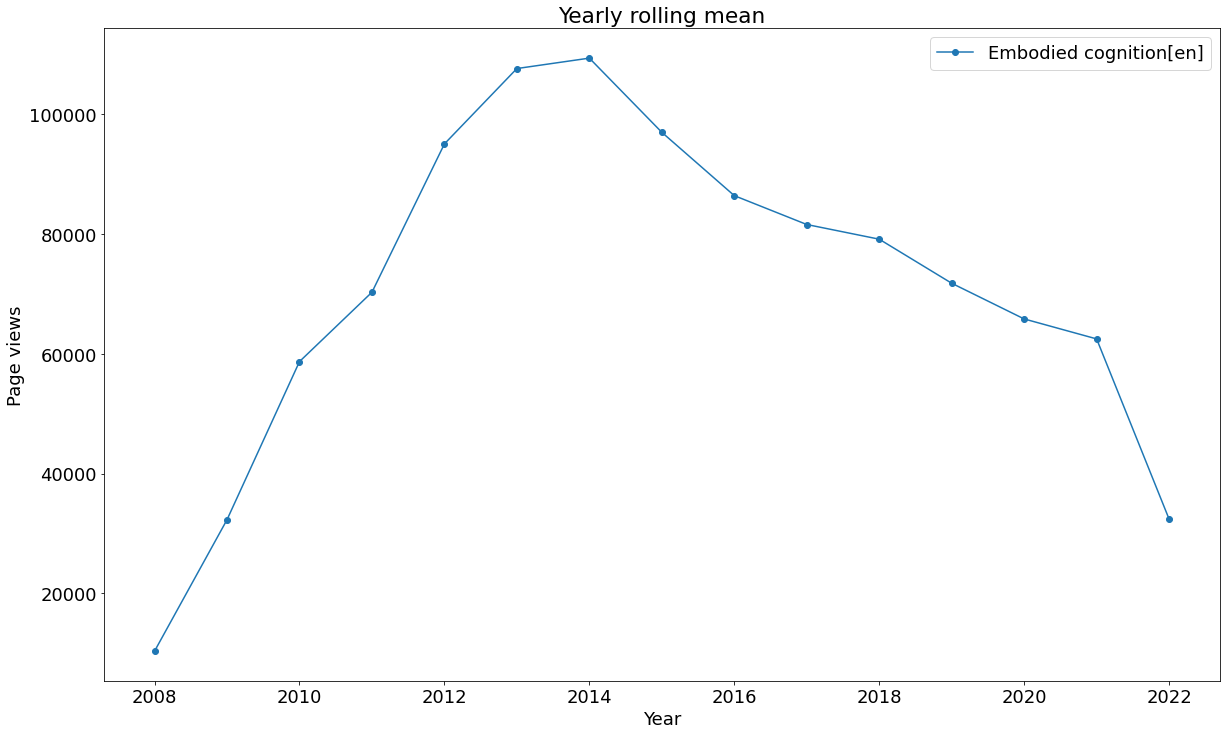

In [49]:
fig, ax = plt.subplots(figsize=(20,12))
views_mean_up[['Embodied cognition[en]']].plot(ax=ax, marker='o')
# views_mean_update.plot(ax=ax, marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")
plt.show()

In [15]:
views_before_project = df_views_count_update['2020-03-01':'2021-02-28']
views_during_project = df_views_count_update['2021-03-01':'2022-02-28']
views_before_project['Embodied cognition[en]'].sum()

64787

In [16]:
views_during_project['Embodied cognition[en]'].sum()

63240

In [17]:

views_before_project['Year'] = 'Before'
views_during_project['Year'] = 'During'
views_during_project

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en],Year
DateTime,,,,,
2021-03-01,242,447,354,545,During
2021-03-02,217,430,410,586,During
2021-03-03,186,421,345,616,During
2021-03-04,225,435,355,695,During
2021-03-05,173,366,380,489,During
...,...,...,...,...,...
2022-02-24,159,305,771,472,During
2022-02-25,165,274,774,415,During
2022-02-26,153,218,546,398,During


In [18]:
joined_df = views_before_project.append(views_during_project)
joined_df['Embodied cognition[en]'].describe()

count    730.000000
mean     175.379452
std       48.813802
min       75.000000
25%      137.250000
50%      173.000000
75%      208.000000
max      380.000000
Name: Embodied cognition[en], dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Embodied cognition[en]'>

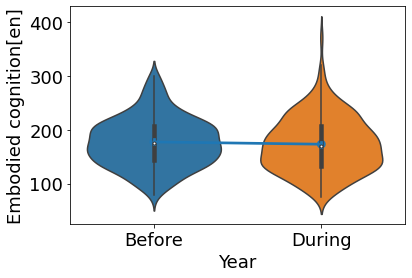

In [19]:
sns.violinplot(x='Year', y='Embodied cognition[en]',data=joined_df)
sns.pointplot(x='Year', y='Embodied cognition[en]',data=joined_df)

In [20]:
views_during_project['Year'] = views_during_project.index.year

views_during_project

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en],Year
DateTime,,,,,
2021-03-01,242,447,354,545,2021
2021-03-02,217,430,410,586,2021
2021-03-03,186,421,345,616,2021
2021-03-04,225,435,355,695,2021
2021-03-05,173,366,380,489,2021
...,...,...,...,...,...
2022-02-24,159,305,771,472,2022
2022-02-25,165,274,774,415,2022
2022-02-26,153,218,546,398,2022


<AxesSubplot:xlabel='Year', ylabel='Embodied cognition[en]'>

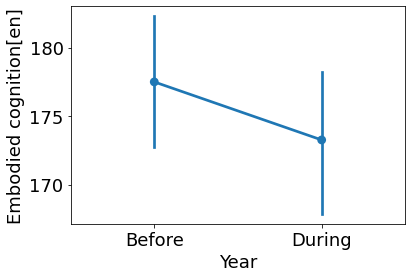

In [21]:
sns.pointplot(x='Year', y='Embodied cognition[en]',data=joined_df)

In [22]:
views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()


# views_during_project
views_before_project_month = views_before_project.index.month
views_during_project_month = views_during_project.index.month

# # views_during_project.tail(50)
#

In [23]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()
views_during_project_mean

DateTime
1     178.419355
2     207.250000
3     196.225806
4     189.400000
5     172.903226
6     157.900000
7     128.741935
8     120.709677
9     148.433333
10    206.064516
11    208.966667
12    167.774194
Name: Embodied cognition[en], dtype: float64

In [24]:
views_before_project_mean

DateTime
1     170.548387
2     189.250000
3     206.580645
4     237.133333
5     191.935484
6     153.866667
7     131.548387
8     128.612903
9     168.400000
10    183.806452
11    200.666667
12    170.387097
Name: Embodied cognition[en], dtype: float64

In [25]:
views_during_mean_update = pd.DataFrame()
views_during_mean_update['Before'] = pd.DataFrame(views_before_project_mean)
views_during_mean_update['During'] = pd.DataFrame(views_during_project_mean)
views_during_mean_update

,Before,During
DateTime,,
1,170.548387,178.419355
2,189.250000,207.250000
3,206.580645,196.225806
4,237.133333,189.400000
5,191.935484,172.903226
6,153.866667,157.900000
7,131.548387,128.741935
8,128.612903,120.709677
9,168.400000,148.433333


In [26]:
labels = df_views_count_all.Date.tolist()

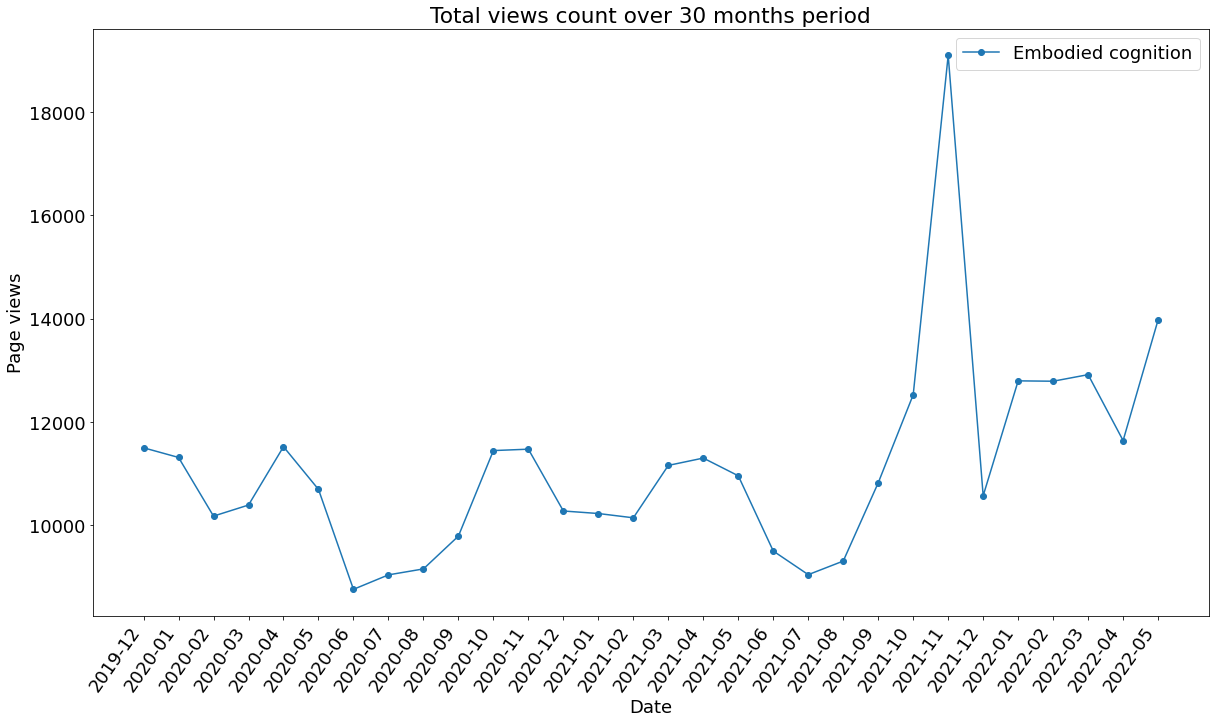

In [27]:
fig, ax = plt.subplots(figsize=(20,12))
df_views_count_all[['Embodied cognition']].plot(ax=ax, marker='o')
# views_mean_update.plot(ax=ax, marker='o')
# ax.set_yscale('log')
plt.xticks(range(0,len(df_views_count_all[['Embodied cognition']].index)),df_views_count_all.Date)
plt.gcf().autofmt_xdate(rotation=55)
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Total views count over 30 months period")
plt.show()

In [28]:
df_views_count_all

,Date,Embodied cognition
0,2019-12,11503
1,2020-01,11316
2,2020-02,10181
3,2020-03,10395
4,2020-04,11524
5,2020-05,10698
6,2020-06,8764
7,2020-07,9044
8,2020-08,9159
9,2020-09,9794


In [29]:
# dateframe datetime as index for normalization
df_views_count_all['Date'] = pd.to_datetime(df_views_count_all["Date"])
df_views_count_date_index = df_views_count_all.set_index("Date")
df_views_count_date_index

,Embodied cognition
Date,
2019-12-01,11503
2020-01-01,11316
2020-02-01,10181
2020-03-01,10395
2020-04-01,11524
2020-05-01,10698
2020-06-01,8764
2020-07-01,9044
2020-08-01,9159


In [30]:
from sklearn import preprocessing
import pandas as pd
# housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
# scaler = preprocessing.MinMaxScaler()
names1 = df_views_count_all['Embodied cognition'].to_numpy()

# d = scaler.fit_transform(df_views_count_all['Embodied cognition'])
#
# scaled_df = pd.DataFrame(d, columns=names)
# scaled_df.head()
# data_array = df_views_count_all['Embodied cognition'].to_numpy()
#
normalized = preprocessing.normalize([names1])



scaled_df = pd.DataFrame(normalized, columns=df_views_count_all['Date']).transpose()
# scaled_df['Normalized views'] = scaled_df
# scaled_df.drop(columns='0', axis=1)
scaled_df

,0
Date,
2019-12-01,0.185599
2020-01-01,0.182581
2020-02-01,0.164268
2020-03-01,0.167721
2020-04-01,0.185938
2020-05-01,0.172610
2020-06-01,0.141405
2020-07-01,0.145923
2020-08-01,0.147779


In [31]:
df_views_count_date_index['Normalized'] = scaled_df
df_views_count_date_index

,Embodied cognition,Normalized
Date,,
2019-12-01,11503,0.185599
2020-01-01,11316,0.182581
2020-02-01,10181,0.164268
2020-03-01,10395,0.167721
2020-04-01,11524,0.185938
2020-05-01,10698,0.172610
2020-06-01,8764,0.141405
2020-07-01,9044,0.145923
2020-08-01,9159,0.147779


AttributeError: 'DataFrame' object has no attribute 'Date'

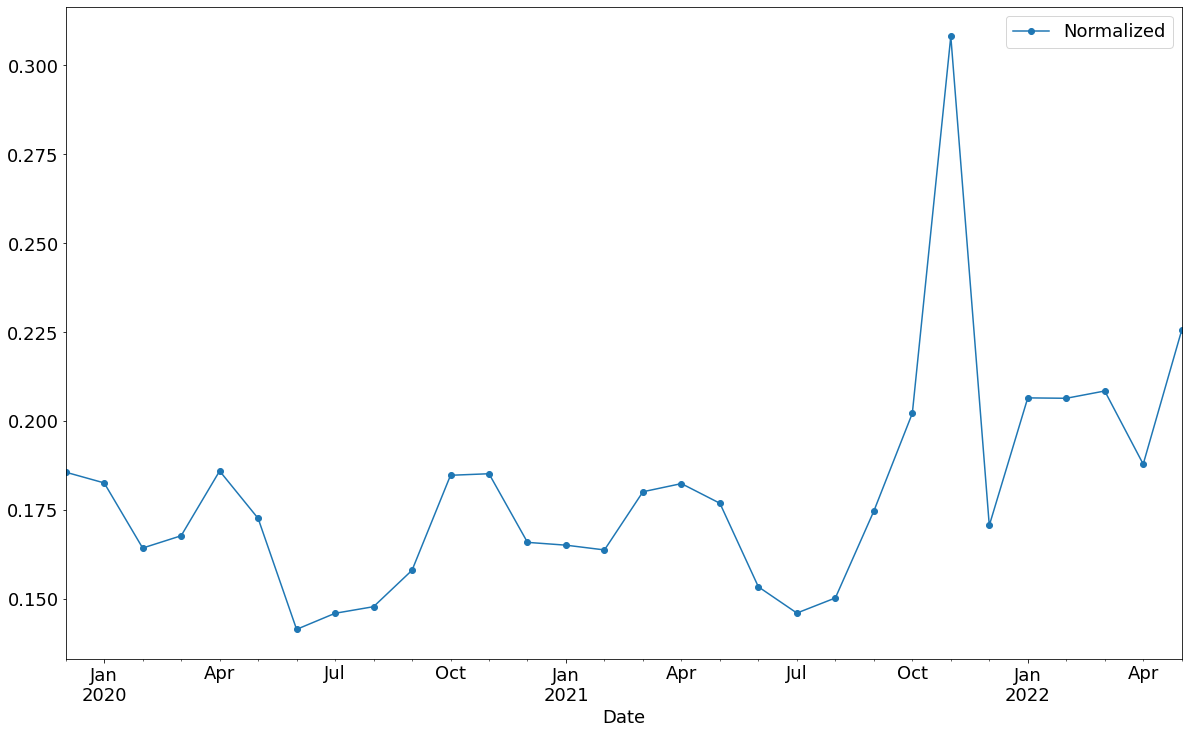

In [32]:
fig, ax = plt.subplots(figsize=(20,12))
df_views_count_date_index[['Normalized']].plot(ax=ax, marker='o')
# views_mean_update.plot(ax=ax, marker='o')
# ax.set_yscale('log')
plt.xticks(range(0,len(df_views_count_date_index[['Normalized']].index)),df_views_count_date_index.Date)
plt.gcf().autofmt_xdate(rotation=55)
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Total views count over 30 months period")
plt.show()

In [ ]:
mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

In [ ]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

In [ ]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()